In [1]:
import os
from glob import glob
import shutil
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tifffile as tff
from skimage.io import imsave
import pickle
from scipy import signal
import scipy.signal as ss


In [2]:
imgPath = '/Users/zhengj10/Desktop/210513/Control/'
# imgPath = '/Volumes/genie/Jihong_GENIE_stuff/iGABASnFR_spontaneous_activity/210312'
dishes = ['Dish_1']
os.path.exists(imgPath)


False

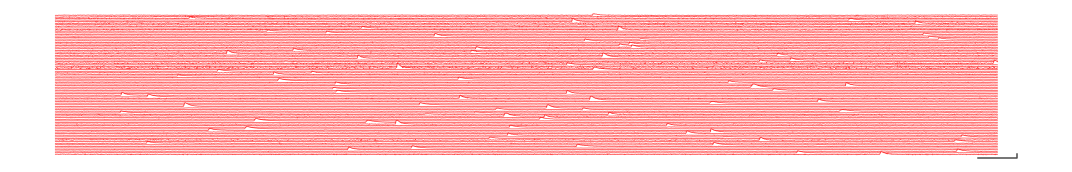

In [40]:
## 210128 data

# # Dish_1 bad trials:
# bad_fovs = [10]
# bad_trials = {
#     7:[5,6]
# }
            
# # Dish_2 bad trials: all except fov13

## 210218 data

# bad_fovs = [1,3,4,7,8,9,10,12,18,19,20,21,22,24,25,26,29,30,31,33,34,38,40,41,42,44,45,46,47]

bad_fovs = []

# sync_fovs = [23,32,43]

sync_fovs = []

# bad_trials = {
#     2:[0],
#     5:[1],
#     6:[1],
#     11:[3,4],
#     13:[0,5],
#     14:[5],
#     16:[0,1],
#     27:[2],
#     28:[3,16,24],
#     35:[1,2,3],
#     39:[0]
# }

bad_trials = {
    
}

fig = plt.figure(figsize=[15,2.5])
# fig = plt.figure(figsize=[12,(90.0)/10])
i = 0
x = np.arange(2400)
# ax = plt.subplot(111)
import scipy.fftpack
control = []
# drug = []
wash = []
for dish in dishes:
    gap = 0
#     print(dish)
    sumPath = os.path.join(imgPath,'summary')
    with open(sumPath+'/dFF_all_FOVs_ROIs.pickle', 'rb') as handle:
        data = pickle.load(handle)

        for fov, dFF in data.items():
            if len(dFF)==0:
                continue
#             if len(dFF)>50: # Remove FOVs with large amount of sync ROIs
#                 continue
            for roi_no in range(len(dFF)):
#             if dish=='Dish_1' and fov in bad_fovs:
#                 continue            

#             if dish=='Dish_2' and fov!=13:
#                 continue
                
#             if fov in [32,43]:
#                 continue


                N = 2400
                T = 1.0 / 100
           
                y = signal.detrend(dFF[roi_no])
                yf = scipy.fftpack.fft(y)
                xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

                if np.max(2.0/N * np.abs(yf[:N//2]))>0.005: # Remove bad ROIs with slow fluctuation
                    continue


                dff = signal.detrend(dFF[roi_no])
                if np.std(dff[:100]>0.04):
                    continue
#                 print(fov,roi_no)

                offset = 0.1*i
                
                
                
                peaks, _ = ss.find_peaks(dff, height=np.max(dff)*0.9)
#                 plt.scatter(peaks,dff[peaks]-offset,color='k',s=10)
#                 plt.plot(x, dff-offset, zorder=i+1, lw=0.75, alpha=0.7, color='#ff7f0e')

#                 if dish=='Dish_2':
#                     plt.plot(x,dff-offset,zorder=i+1,lw=0.75,color='k',alpha=0.7)
            
            
# #                     if peaks.shape[0] == 1:
#                     control.append(dff[peaks[0]-20:peaks[0]+50])
    
# #                     elif peaks[1]-peaks[0]>5:
# #                         control.append(dff[peaks[0]-20:peaks[0]+50])
# #                         control.append(dff[peaks[1]-20:peaks[1]+50])
                        
#                 else:
#                     plt.plot(x,dff-offset,zorder=i+1,lw=0.75,color='r',alpha=0.7)
                    
                    
#                     if peaks.shape[0] == 1:
#                         drug.append(dff[peaks[0]-20:peaks[0]+50])
#                     elif peaks[1]-peaks[0]>5:
#                         drug.append(dff[peaks[0]-20:peaks[0]+50])
#                         drug.append(dff[peaks[1]-20:peaks[1]+50])
                    
                    
                
                
                if fov<30:
#                     plt.plot(x, dff-offset, zorder=i+1, lw=0.75, alpha=0.7, color='#1f77b4')
                    plt.plot(x, dff-offset, zorder=i+1, lw=0.75, alpha=0.7, color='r')


    
                    if peaks.shape[0] == 1:
                        control.append(dff[peaks[0]-20:peaks[0]+50])
                    elif peaks[1]-peaks[0]>5:
                        control.append(dff[peaks[0]-20:peaks[0]+50])
                        control.append(dff[peaks[1]-20:peaks[1]+50])

#                 elif 15<=fov<31:
# #                     plt.plot(x, dff-offset, zorder=i+1, lw=0.75, alpha=0.7, color='#ff7f0e')
#                     plt.plot(x, dff-offset, zorder=i+1, lw=0.75, alpha=0.7, color='r')
#                     if peaks.shape[0] == 1:
#                         drug.append(dff[peaks[0]-20:peaks[0]+50])
#                     elif peaks[1]-peaks[0]>5:
#                         drug.append(dff[peaks[0]-20:peaks[0]+50])
#                         drug.append(dff[peaks[1]-20:peaks[1]+50])
#                 else:
# #                     plt.plot(x, dff-offset, zorder=i+1, lw=0.75, alpha=0.7, color='#2ca02c')
#                     plt.plot(x, dff-offset, zorder=i+1, lw=0.75, alpha=0.7, color='g')
#                     if peaks.shape[0] == 1:
#                         wash.append(dff[peaks[0]-22:peaks[0]+48])
#                     elif peaks[1]-peaks[0]>5:
#                         wash.append(dff[peaks[0]-22:peaks[0]+48])
#                         wash.append(dff[peaks[1]-22:peaks[1]+48])

                plt.fill_between(x, dff-offset, 0-offset, zorder=i+1, facecolor='w', edgecolor='w', lw=0, 
                                 closed=True)
                plt.axis('off')
                i+=1
#         plt.plot([2350,2450,2450],[-offset-0.2,-offset-0.2,-offset],color='r',alpha=0.5)


plt.plot([2350,2450,2450],[-offset-0.2,-offset-0.2,-offset],color='k',alpha=0.7)
# plt.ylim([-0.01,0.03])
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/iGABASnFR/dFF_all.pdf',format='pdf')
# fig.savefig('/Users/zhengj10/Desktop/210519/mini_tiagabine.png')
plt.show()

In [23]:
# control

In [24]:
np.max(dff[:150])

0.03251126131256511

In [25]:
for k,v in data.items():
    print(k,len(v))

1 3
2 14
3 0
4 4
5 4
6 5
7 7
8 3
9 15
10 3
11 7
12 23
13 25
14 26
15 17


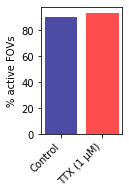

In [21]:
plt.figure(figsize=[1.9,2.8])
# plt.bar(['iGABASnFR','iGABASnFR 2'],[100/20,1800/20],color=['k','r'],alpha=0.7)
# plt.bar(['Control','Tiagabine (10 \u03BCM)','Washout'],[700/15.0,500/17.0,300/15.0],color=['navy','r','g'],alpha=0.7)
plt.bar(['Control','TTX (1 \u03BCM)'],[900/10.0,1400/15.0],color=['navy','r'],alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.ylabel('% active FOVs')
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/210427/TTX_percent_act_FOVs.png')
plt.show()


In [41]:
control_sel = []
drug_sel = []
wash_sel = []

for i in control:
    if i.shape[0]!=70:
        continue
    control_sel.append(i)
    
for i in drug:
    if i.shape[0]!=70:
        continue
    drug_sel.append(i)
    
# for i in wash:
#     if i.shape[0]!=70:
#         continue
#     wash_sel.append(i)
    

In [42]:
control_mean = np.mean(control_sel,axis=0)
drug_mean = np.mean(drug_sel,axis=0)
# wash_mean = np.mean(wash_sel,axis=0)

control_sem = np.std(control_sel,axis=0)/np.sqrt(len(control_sel))
drug_sem = np.std(drug_sel,axis=0)/np.sqrt(len(drug_sel))
# wash_sem = np.std(wash_sel,axis=0)/np.sqrt(len(wash_sel))

In [43]:
drug

[array([-0.00259146,  0.00099531, -0.00813954,  0.00313936, -0.01146326,
         0.00163458,  0.00124378, -0.00052765, -0.00207994, -0.00858499,
         0.00201455, -0.00817222, -0.00565929, -0.00782519,  0.00222648,
        -0.00940667, -0.00431874, -0.00267144, -0.00570299,  0.06443941,
         0.13325595,  0.13084899,  0.12976787,  0.10736353,  0.10394848,
         0.09523001,  0.09156294,  0.08472915,  0.08063474,  0.06493637,
         0.06998047,  0.06171126,  0.04570608,  0.04328816,  0.05323025,
         0.04001923,  0.0414912 ,  0.02985805,  0.03427758,  0.03164051,
         0.03573131,  0.02820721,  0.02571258,  0.0207087 ,  0.02482142,
         0.02023392,  0.0152629 ,  0.01826892,  0.01471142,  0.00703391,
         0.01788548,  0.00521137,  0.01505484,  0.00345456,  0.00674548,
         0.01135129,  0.0014275 ,  0.00764405,  0.00157729, -0.00291159,
         0.01580743, -0.00132637, -0.00192535,  0.00191343,  0.00836009,
         0.0035644 ,  0.00415978,  0.0123158 , -0.0

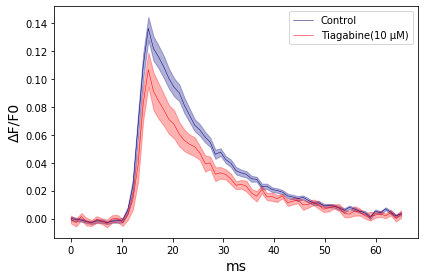

In [48]:
x = np.linspace(0,65,65)
    
# plt.plot(x,control_mean,label='control',color='navy',lw=0.5)
# plt.fill_between(x, control_mean+control_sem,control_mean-control_sem,alpha=0.3,color='navy')

# plt.plot(x,drug_mean,label='TTX(1 \u03BCM)',color='r',lw=0.5)
# plt.fill_between(x, drug_mean+drug_sem,drug_mean-drug_sem,alpha=0.3,color='r')


plt.plot(x,control_mean[5:],label='Control',color='navy',lw=0.5)
plt.fill_between(x, control_mean[5:]+control_sem[5:],control_mean[5:]-control_sem[5:],alpha=0.3,color='navy')

plt.plot(x,drug_mean[5:],label='Tiagabine(10 \u03BCM)',color='r',lw=0.5)
plt.fill_between(x, drug_mean[5:]+drug_sem[5:],drug_mean[5:]-drug_sem[5:],alpha=0.3,color='r')




# plt.plot(x,wash_mean[10:]-0.01,label='Washout',color='g',lw=0.5)
# plt.fill_between(x, wash_mean[10:]-0.01+wash_sem[10:],wash_mean[10:]-0.01-wash_sem[10:],alpha=0.3,color='g')
plt.legend()
plt.ylabel('\u0394F/F0',size=14)
plt.xlabel('ms',size=14)
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/210519/mini_comp_control_vs_Tiagabine.png')
plt.show()


IndexError: invalid index to scalar variable.

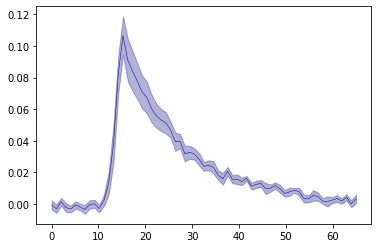

In [19]:
x = np.linspace(0,65,65)
    
plt.plot(x,control_mean[5:],label='control',color='navy',lw=0.5)
plt.fill_between(x, control_mean[5:]+control_sem[5:],control_mean[5:]-control_sem[5:],alpha=0.3,color='navy')

plt.plot(x,drug_mean[5:],label='TTX(1 \u03BCM)',color='r',lw=0.5)
plt.fill_between(x, drug_mean[5:]+drug_sem[5:],drug_mean[5:]-drug_sem[5:],alpha=0.3,color='r')

# plt.plot(x,wash_mean[10:]-0.01,label='Washout',color='g',lw=0.5)
# plt.fill_between(x, wash_mean[10:]-0.01+wash_sem[10:],wash_mean[10:]-0.01-wash_sem[10:],alpha=0.3,color='g')
plt.legend()
plt.ylabel('\u0394F/F0',size=14)
plt.xlabel('ms',size=14)
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/210427/mini_comp.png')
plt.show()


In [ ]:
import scipy.signal as ss
peaks, _ = ss.find_peaks(dff, height=np.max(dff)*0.9)


In [ ]:
plt.plot(dff)
plt.scatter(peaks,dff[peaks],color='m')

In [ ]:
peaks

In [ ]:
# for fov, dFF in data.items():
#     print(fov,len(dFF))
np.max(dff)

### Go through all traces to label bad trials:

In [ ]:
with open(sumPath+'/dFF_all_FOVs_ROIs.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [ ]:
dFF = data[11]
# plt.figure(figsize=[8,20])
for roi_no in range(len(dFF)):
#                 if np.std(dff)>0.025:
#                     continue
#                 if np.std(dff[:100])>0.015:
#                     continue
#         print(fov)
    offset = 0.2*i
    plt.plot(x, dFF[roi_no]-offset, zorder=i+1, color='k', lw=0.5)
    plt.axis('off')
    i+=1

In [ ]:
bad_fovs = [1,3,4,7,8,9,10,12,18,19,20,21,22,24,25,26,29,30,31,33,34,38,40,41,42,44,45,46,47]
sync_fovs = [23,32,43]
bad_trials = {
    2:[0],
    5:[1],
    6:[1],
    11:[4],
    13:[0,5],
    14:[5],
    16:[0,1],
    27:[2],
    28:[3,16,24],
    35:[1,2,3],
    39:[0]
}

In [ ]:
bad_fovs = []

for k,v in data.items():
    if len(v) == 0:
        bad_fovs.append(k)